In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import os

In [11]:
dataset=pd.read_csv(r"D:\Projects\Python\4.Gold-Price-Prediction\gld_price_data.csv")

In [12]:
dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [14]:
dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [15]:
dataset.shape

(2290, 6)

In [16]:
dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


<Axes: >

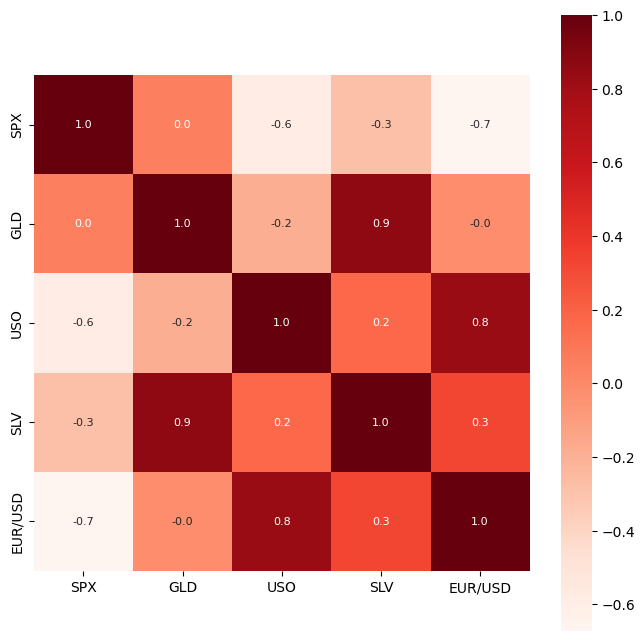

In [30]:
num_data = dataset.select_dtypes(include=['float64', 'int64'])
correlation=num_data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True, square=True,fmt='.1f',annot=True ,annot_kws={'size':8},cmap='Reds')


In [31]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


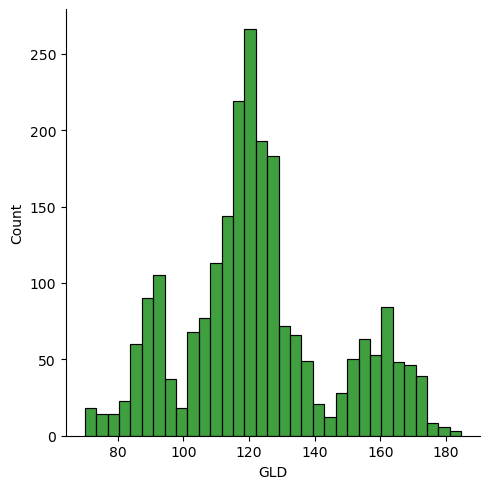

In [37]:
sns.displot(num_data['GLD'],color="green")

In [39]:
X=dataset.drop(['Date','GLD'],axis=1)
Y=dataset['GLD']

In [40]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [41]:
model=RandomForestRegressor(n_estimators=100)

In [42]:
model.fit(X_train,Y_train)

RandomForestRegressor()

In [43]:
test_data_prediction=model.predict(X_test)

In [44]:
print(test_data_prediction)

[168.64229979  82.14399975 116.08030008 127.65050104 120.7399012
 154.53029782 150.13059875 126.22410019 117.39209883 125.94860104
 116.92040095 172.82070097 141.71859866 167.53409829 115.07960004
 117.52450038 138.89570345 169.73200078 159.23580274 159.07469901
 155.11310024 125.09710021 176.01259865 156.61280338 125.19800076
  93.81939935  77.21990012 120.24030038 119.15879917 167.50999967
  88.33700059 125.03629997  91.14650049 117.74100025 121.04349901
 136.2654007  115.7087011  115.1904006  147.58380082 107.38390072
 104.58200247  87.17339796 126.48370071 118.06479971 151.5604998
 119.59550016 108.37090018 107.90649809  92.88710011 127.11089808
  74.84200038 113.71069962 120.97100038 111.39319884 118.90589893
 120.53299913 158.84550084 167.29050077 147.34009638  86.04659868
  94.18720023  86.76049906  90.63320049 118.96330063 126.41840063
 127.4423997  170.04250051 122.35329967 117.45539899  98.65780011
 168.40510103 143.15809835 131.90390291 121.06380202 121.11599952
 119.8543003

In [45]:
error=metrics.r2_score(Y_test,test_data_prediction)
print("R square error",error)

R square error 0.9888799000282987


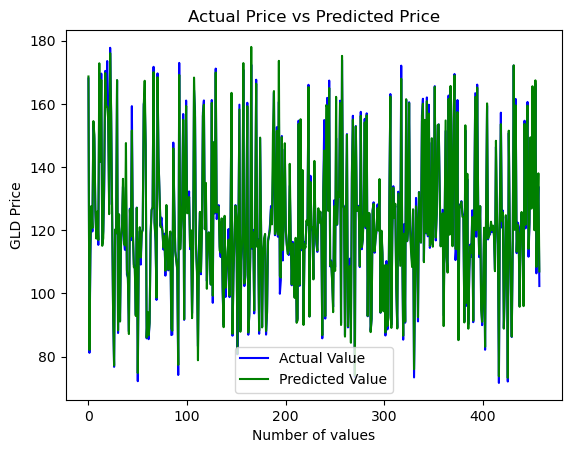

In [49]:
#Compare the actual values
Y_test = list(Y_test)

# Plot actual vs predicted values
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')

# Add title and labels
plt.title("Actual Price vs Predicted Price")
plt.xlabel('Number of values')  # Correct spelling
plt.ylabel('GLD Price')  # Correct spelling

# Add a legend
plt.legend()

# Show the plot
plt.show()
